In [27]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas as pd
import os
import shutil
from matplotlib.colors import ListedColormap
import numpy as np

In [2]:
# Get the current working directory (where the notebook is located)
current_dir = os.getcwd()
# Add path to load results
results_dir = os.path.join(current_dir, "results")
# Add path to save analysis results
analysis_results_dir = os.path.join(current_dir, "analysis_results")
# Check if the directory exists
if os.path.exists(analysis_results_dir):
    # Iterate over all the files in the directory
    for filename in os.listdir(analysis_results_dir):
        file_path = os.path.join(analysis_results_dir, filename)
        try:
            # Check if it is a file and delete it
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            # Check if it is a directory and delete it
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")
    print(f"The directory {analysis_results_dir} has been cleared.")
else:
    os.makedirs(analysis_results_dir)
    print(f"The directory {analysis_results_dir} has been created.")

The directory c:\Users\louis\OneDrive - Georgia Institute of Technology\GATech\2024 sem 4 fall\ISYE 6644\Project\pandemic-flu-spread\pandemic-flu-spread\analysis_results has been cleared.


In [ ]:
# read the data
histogram_results_df = pd.read_excel(os.path.join(results_dir,"histogram_results.xlsx"))
state_over_time_results_df = pd.read_excel(os.path.join(results_dir,"state_over_time_results.xlsx"))

In [4]:
# for each metric in histogram_results_df['Metric'], create a new variable with the data for that metric
metrics = histogram_results_df['Metric'].unique()
for metric in metrics:
    globals()[f"{metric}_data"] = histogram_results_df[histogram_results_df['Metric'] == metric]
    print(f"{metric}_data")

total_infections_data
total_deaths_data
peak_infections_data
total_days_data


In [5]:
def plot_heatmap(data: pd.DataFrame, infections_rate: float, ax, vmin=None, vmax=None):
    """
    Plots a heatmap for the given data with social_distancing_start_day as the y-axis,
    mask_start_day as the x-axis, and Median as the values.

    Args:
        data (pd.DataFrame): The input data containing 'social_distancing_start_day', 'mask_start_day', and 'Median'.
        infection_rate (float): The infection rate to include in the title.
        ax (matplotlib.axes.Axes): The axes on which to plot the heatmap.
        vmin (float): Minimum value for the color scale.
        vmax (float): Maximum value for the color scale.
    """
    # Derive the dataset name from the Metric column
    dataset_name = data['Metric'].iloc[0].replace('total_', '').replace('_', ' ').capitalize()

    # Pivot the data to create a matrix for the heatmap
    heatmap_data = data.pivot_table(
        index='social_distancing_start_day',
        columns='mask_start_day',
        values='Median',
        aggfunc='median'
    )

    # Plot the heatmap
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False, ax=ax, vmin=vmin, vmax=vmax)
    ax.set_title(f'Median {dataset_name}\nInfection Rate: {infection_rate}')
    ax.set_xlabel('Mask Start Day')
    ax.set_ylabel('Social Distancing Start Day')



In [6]:
for metric in metrics:
    print(f"Metric: {metric}")
    infection_rates = histogram_results_df['infection_rate'].unique()
    num_plots = len(infection_rates)
    
    # Create a 3-row by 2-column subplot layout
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration
    
    # Determine the global min and max for the color scale within the same metric
    metric_data = globals()[f"{metric}_data"]
    vmin = metric_data['Median'].min()
    vmax = metric_data['Median'].max()
    
    for i, infection_rate in enumerate(infection_rates):
        if i < len(axes):
            total_data = globals()[f"{metric}_data"]
            data = total_data.loc[total_data['infection_rate'] == infection_rate].copy()
            plot_heatmap(data, infections_rate=infection_rate, ax=axes[i], vmin=vmin, vmax=vmax)
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Add a single color bar at the bottom
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
    fig.colorbar(plt.cm.ScalarMappable(cmap="YlGnBu", norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax, orientation='horizontal')
    cbar_ax.set_xlabel('Median Infections')
    
    # Suppress specific warning
    warnings.filterwarnings("ignore", category=UserWarning, message=".*tight_layout.*")

    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
    # Save the figure
    fig.savefig(os.path.join(analysis_results_dir, f"{metric}_heatmaps.png"))
    plt.close(fig)

Metric: total_infections
Metric: total_deaths
Metric: peak_infections
Metric: total_days


In [34]:
# combine mask_start_day and social_distancing_start_day as (mask_start_day, social_distancing_start_day)
state_over_time_results_df['mask_start_day, social_distancing_start_day'] = state_over_time_results_df[['mask_start_day', 'social_distancing_start_day']].apply(tuple, axis=1)

In [35]:
# for each state in state_over_time_results_df['State'], create a new variable with the data for that state
states = state_over_time_results_df['State'].unique()
for state in states:
    globals()[f"{state}_data"] = state_over_time_results_df[state_over_time_results_df['State'] == state]
    print(f"{state}_data") 

susceptible_data
infected_data
infectious_data
recovered_data
dead_data
vaccination_data
masking_data
cumulative_vaccinated_data
cumulative_masked_data
vaccine_supply_data


In [91]:
title_dict = {'susceptible': 'Daily Expected Number of Susceptible', 'infected' : 'Daily Expected Number of Infected'
            , 'infectious' : 'Daily Expected Number of Infectious', 'recovered' : 'Daily Expected Number of Recovered'
            , 'dead' : 'Daily Expected Number of Dead', 'vaccination' : 'Daily Expected Number of Vaccination'
            , 'masking': 'Daily Expected Number of Masking', 'cumulative_vaccinated': 'Daily Expected Number of Cumulative Vaccinated'
            , 'cumulative_masked': 'Daily Expected Number of Cumulative Masked', 'vaccine_supply': 'Daily Expected Number of Vaccine Supply'}

In [ ]:
def plot_line_graphs(data: pd.DataFrame, infection_rates: list, title: str, save_path: str):
    """
    Plots line graphs with Day as the X-axis, Mean as the Y-axis, and each line representing a combination of
    mask_start_day and social_distancing_start_day for each infection_rate.
    All graphs are plotted in one image with a single legend at the bottom.

    Args:
        data (pd.DataFrame): The input data containing 'Day', 'Mean', 'infection_rate', 'mask_start_day', and 'social_distancing_start_day'.
        infection_rates (list): List of infection rates to plot.
        title (str): The title of the plot.
        save_path (str): The path to save the plot.
    """
    num_plots = len(infection_rates)
    ncols = 2
    nrows = (num_plots + 1) // ncols  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration
    
    # Get a colormap
    base_colormap = plt.colormaps['tab10']
    unique_combinations = data[['mask_start_day', 'social_distancing_start_day']].drop_duplicates()
    colormap = ListedColormap(base_colormap(np.linspace(0, 1, len(unique_combinations))))
    
    for i, infection_rate in enumerate(infection_rates):
        ax = axes[i]
        subset = data[data['infection_rate'] == infection_rate]
        
        for j, (mask_start_day, social_distancing_start_day) in enumerate(unique_combinations.values):
            line_data = subset[(subset['mask_start_day'] == mask_start_day) & (subset['social_distancing_start_day'] == social_distancing_start_day)]
            ax.plot(line_data['Day'], line_data['Mean'], label=f'mask: {mask_start_day}, social: {social_distancing_start_day}', color=colormap(j))
        
        ax.set_title(f'Infection Rate: {infection_rate}')
        ax.set_xlabel('Day')
        ax.set_ylabel('Mean')
        ax.grid(True)
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Add a single legend at the bottom
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower right', ncol=2, title='(Mask Start Day, Social Distancing Start Day')
    
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    plt.suptitle(title, fontsize=16, fontweight='bold')
    # Save the plot
    plt.savefig(save_path)




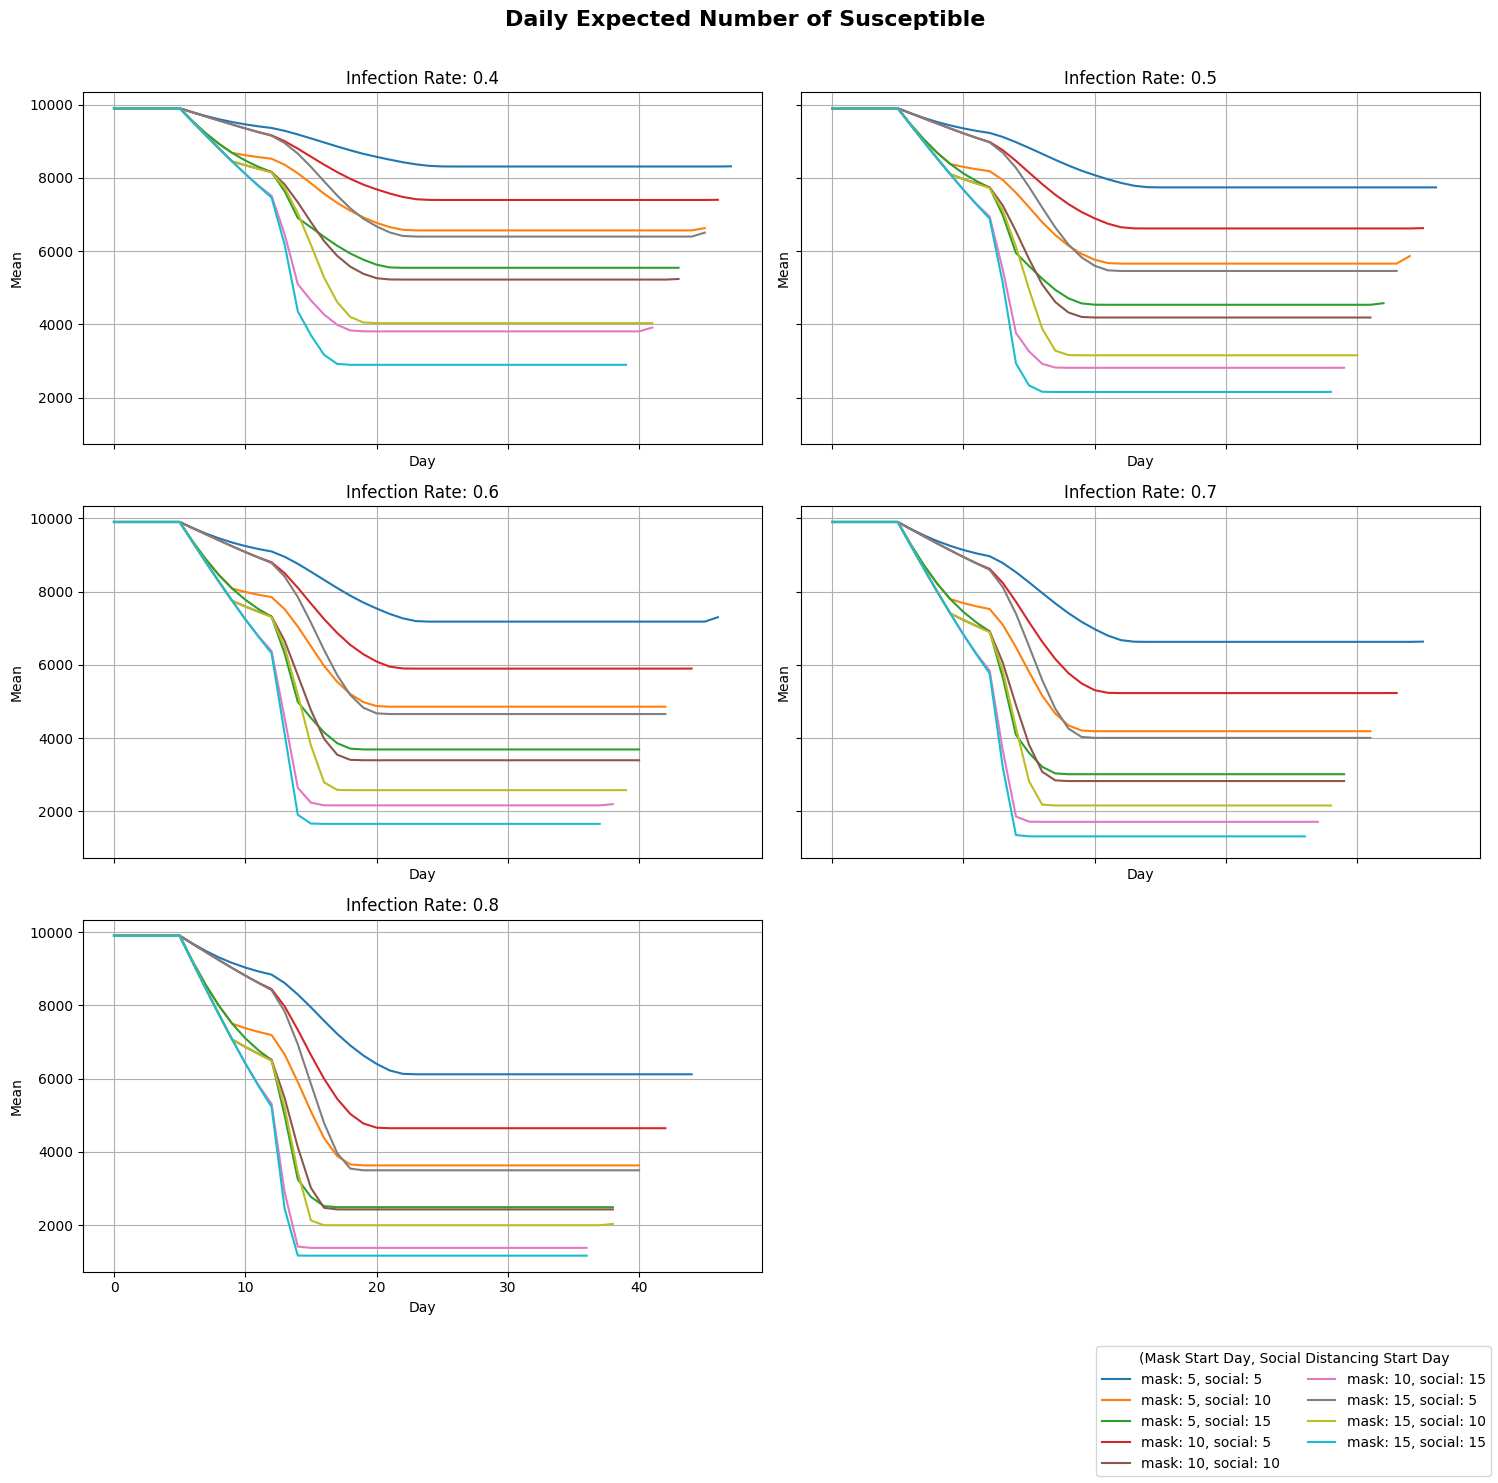

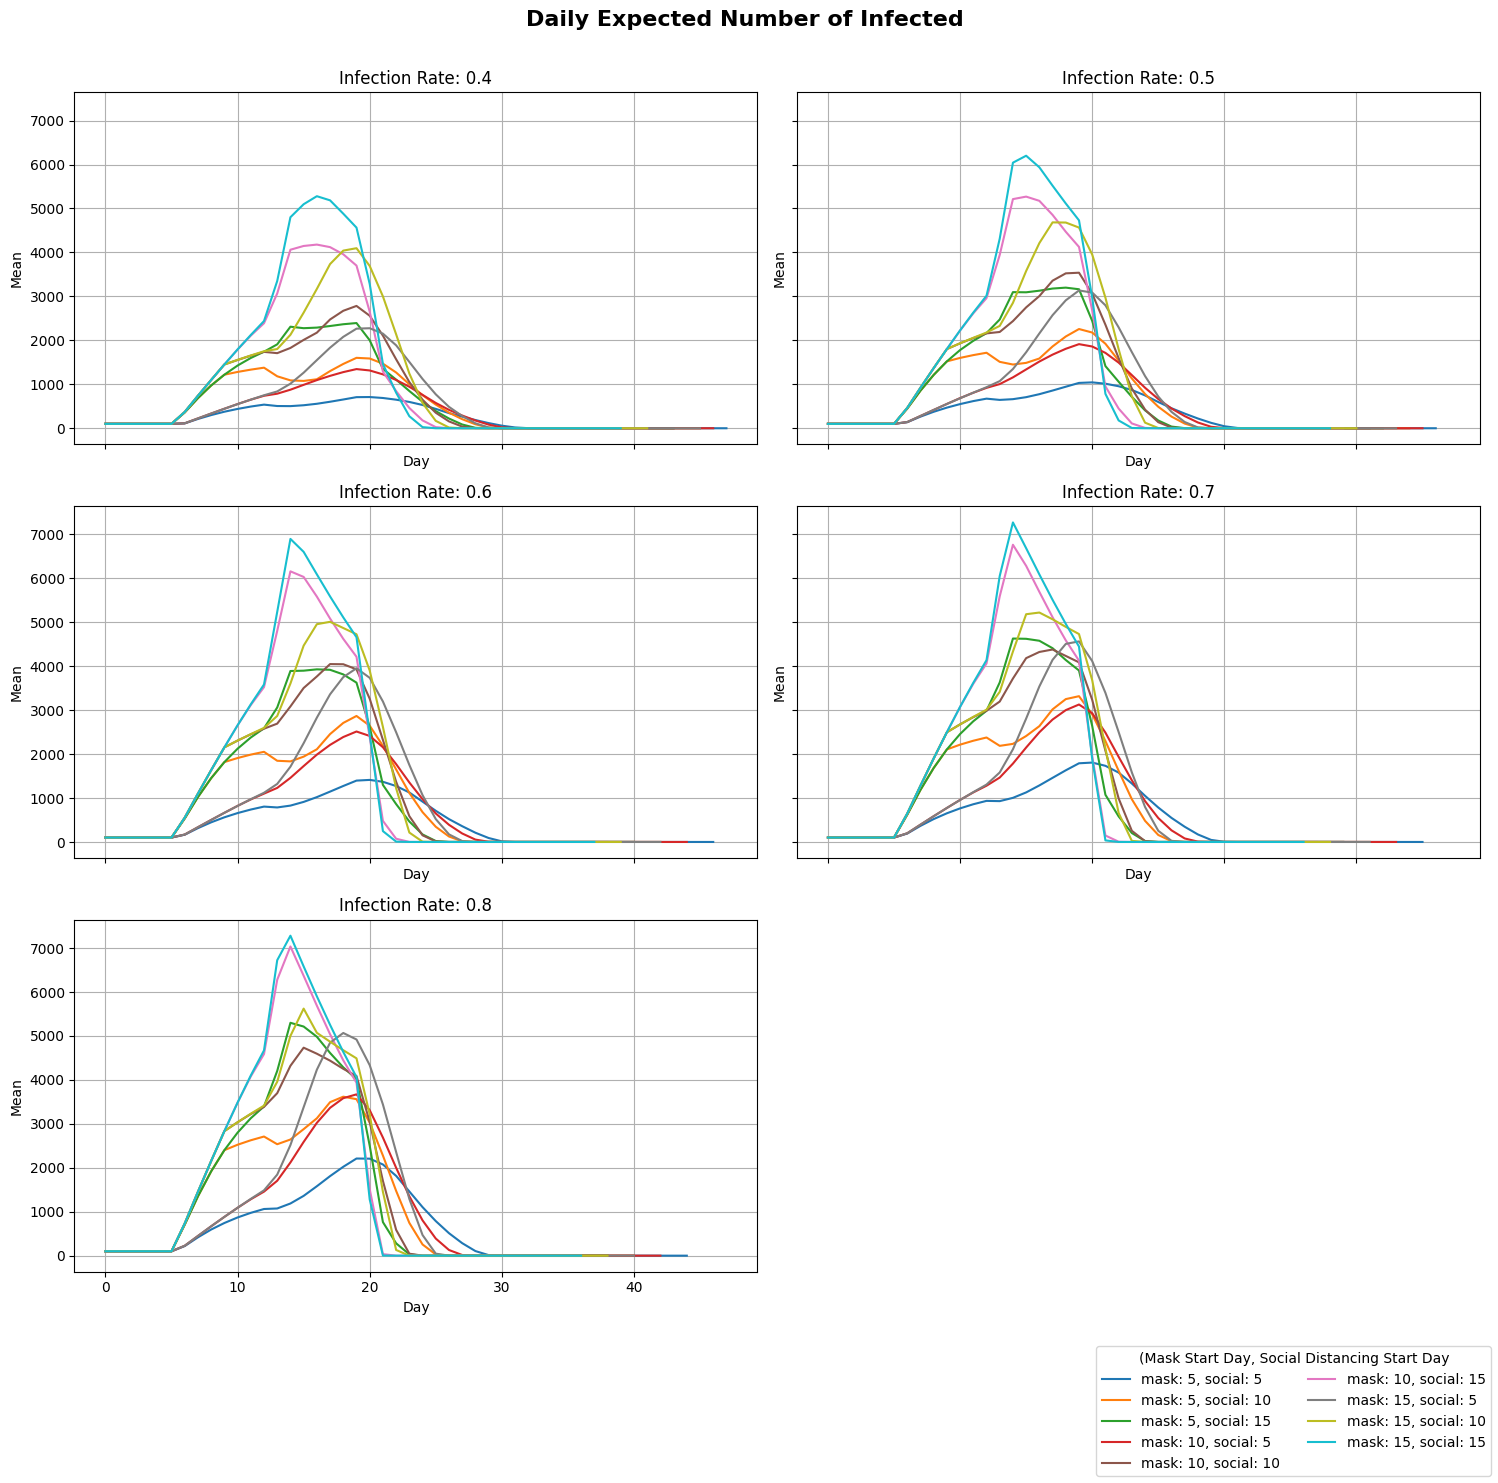

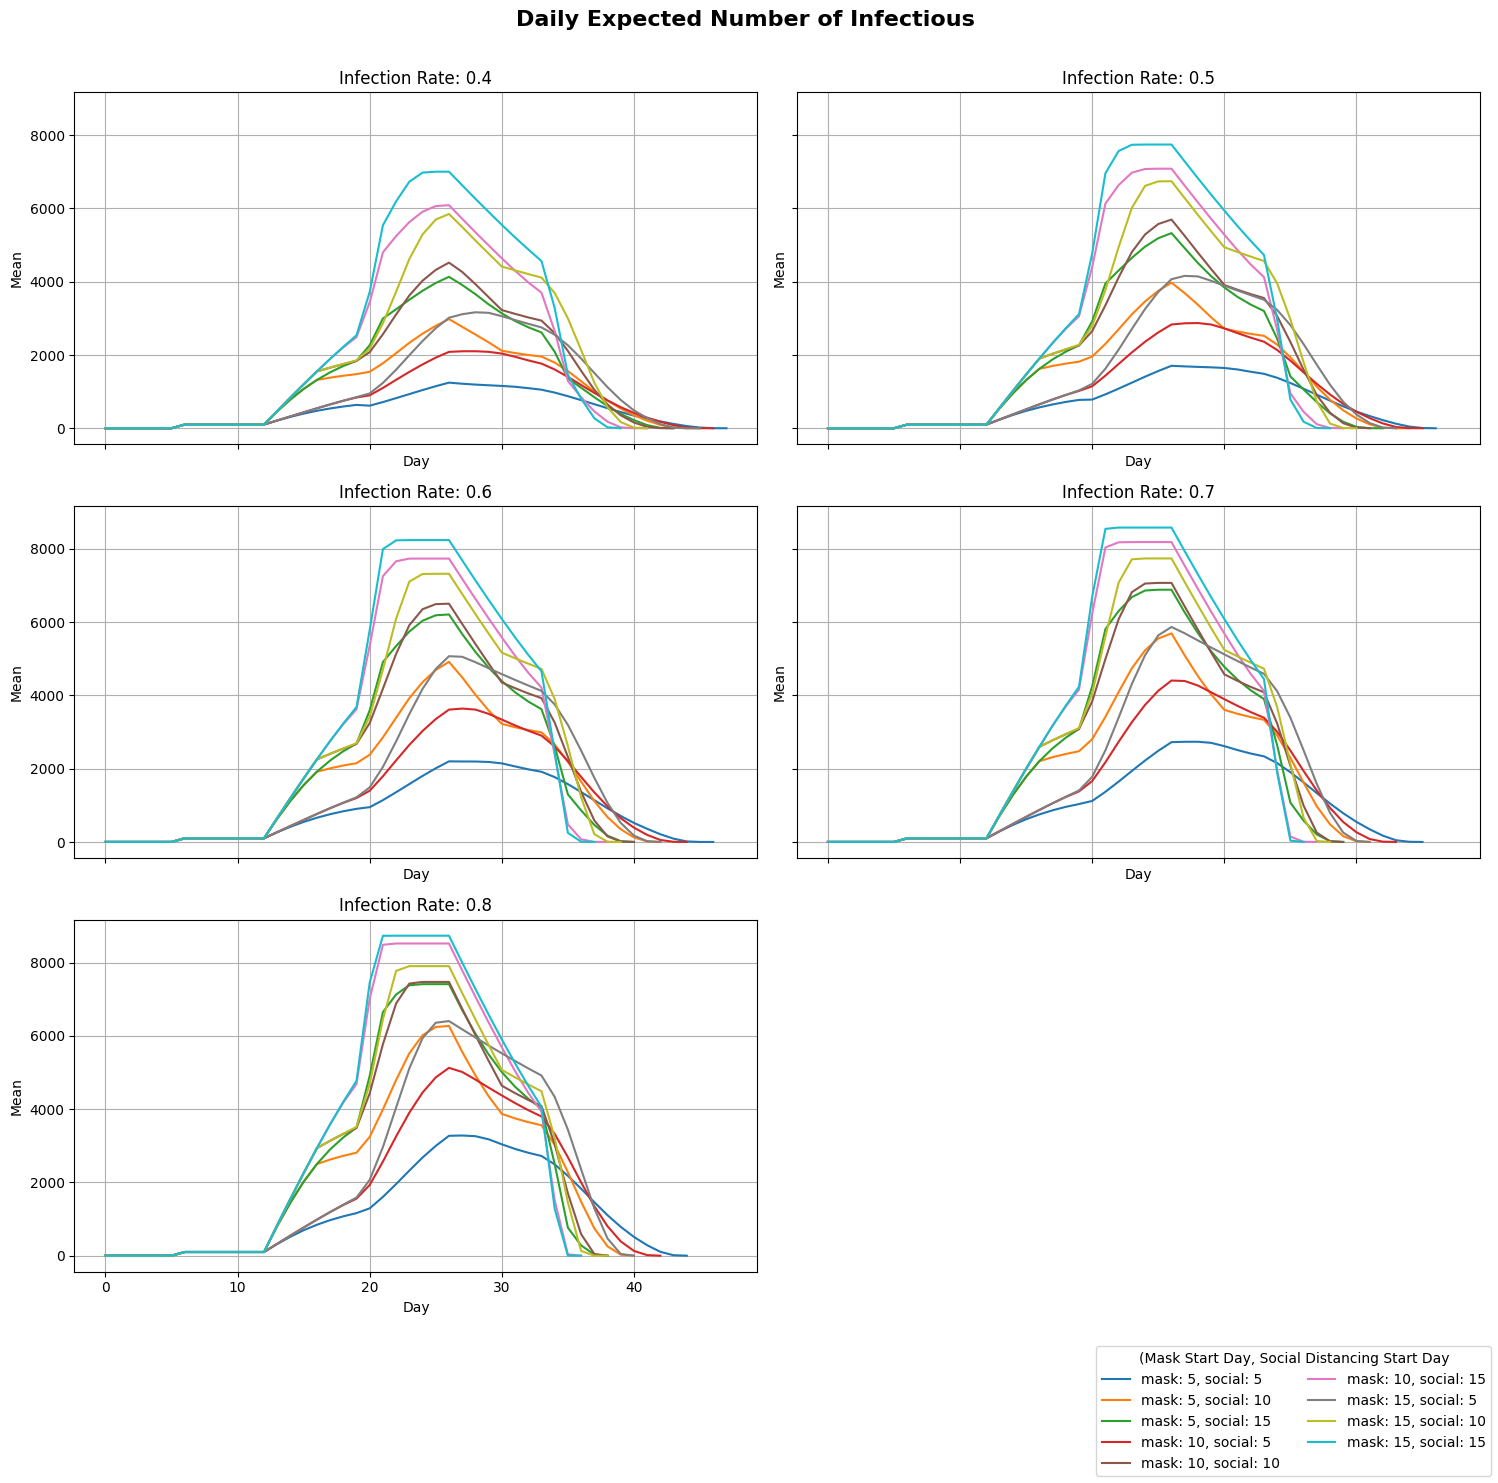

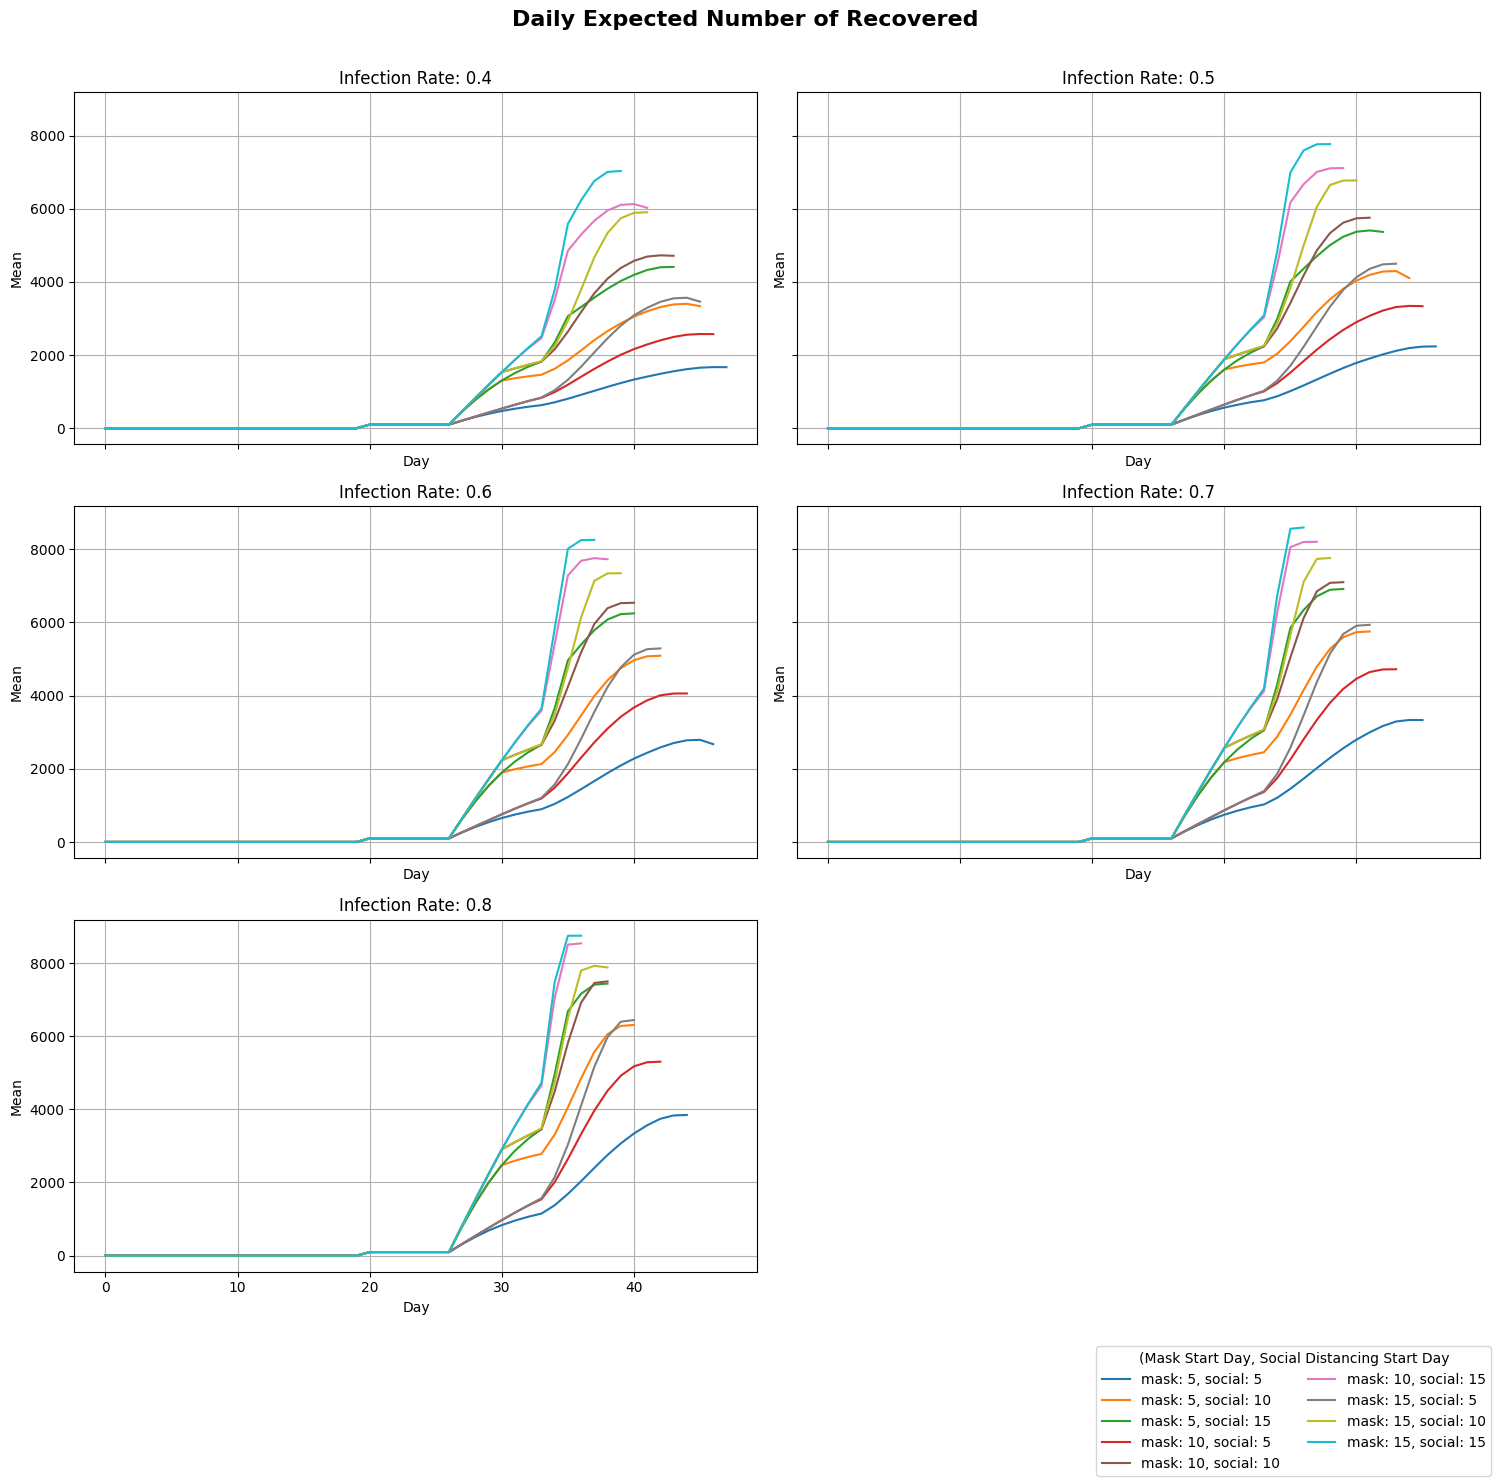

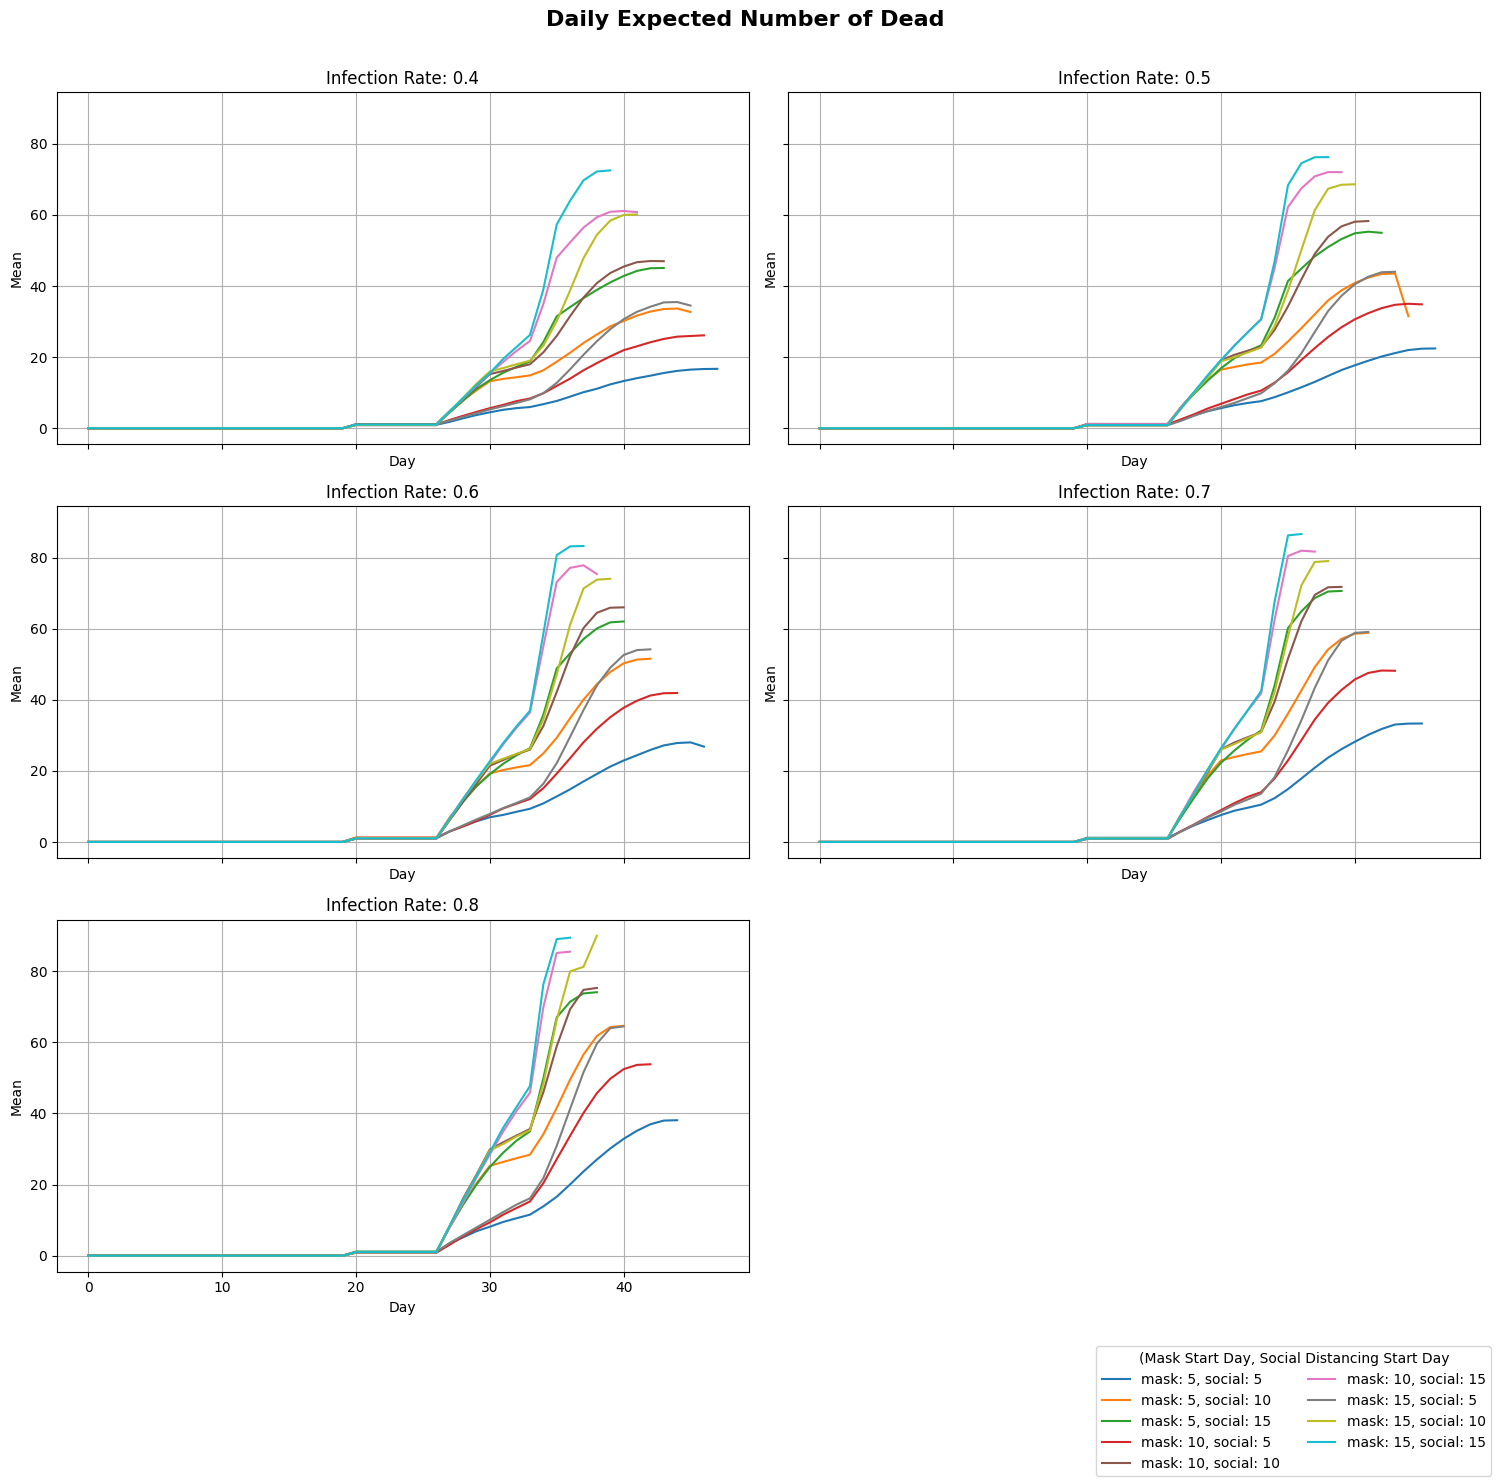

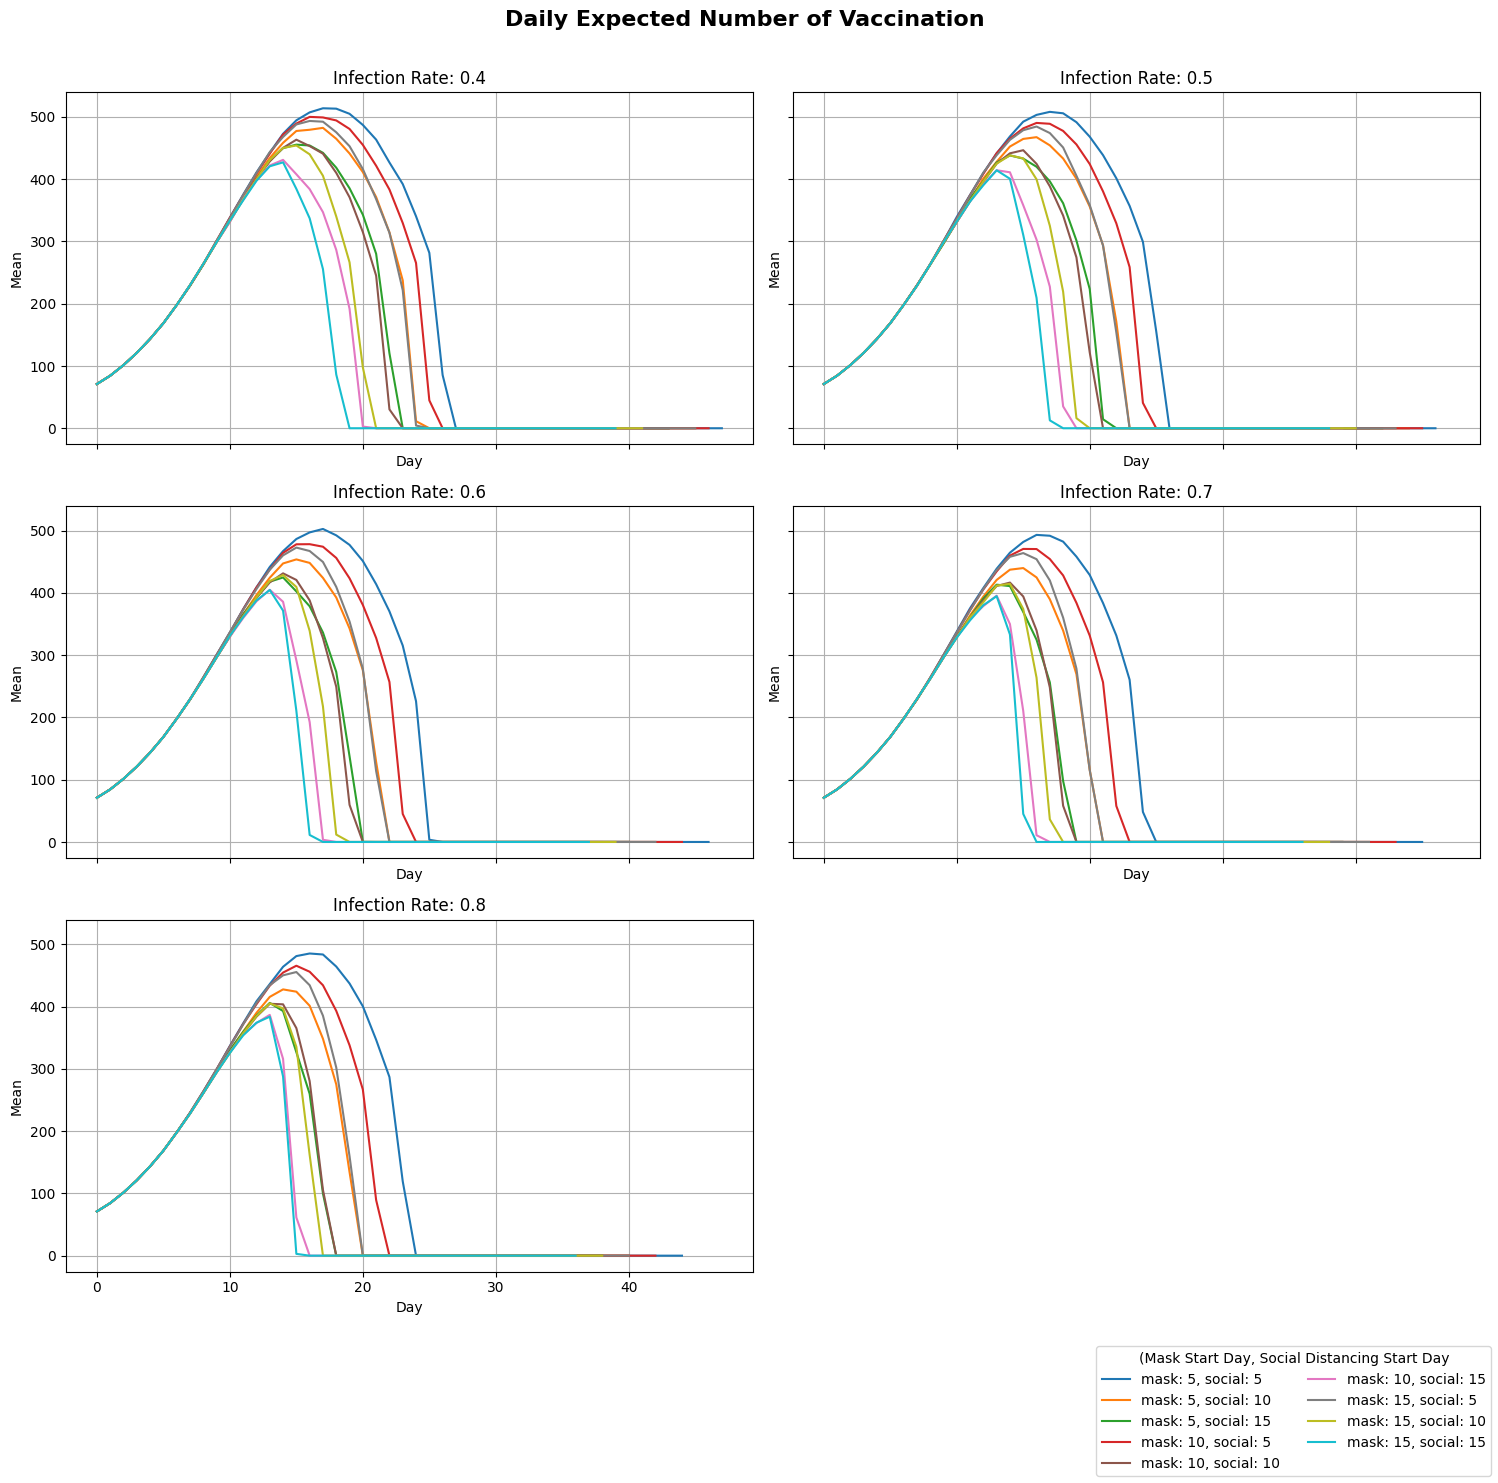

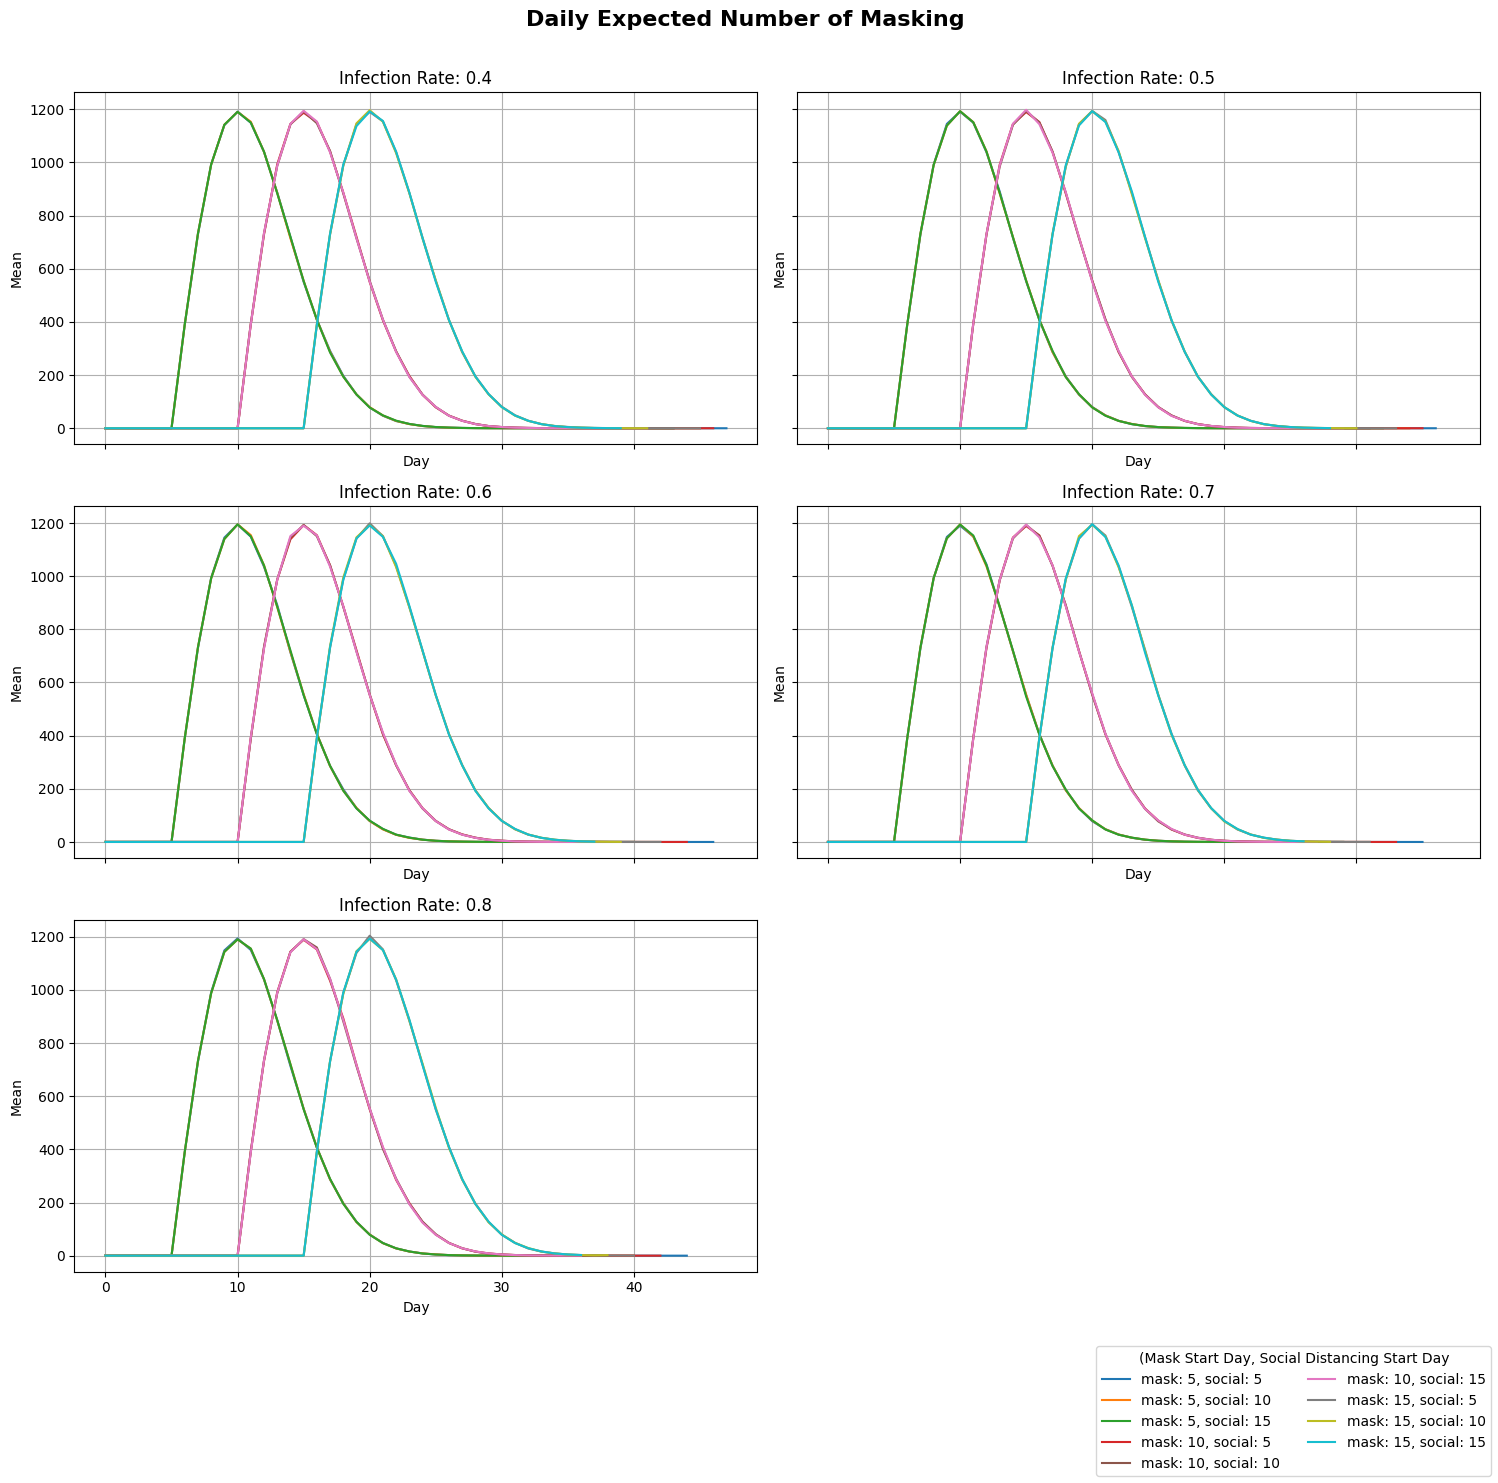

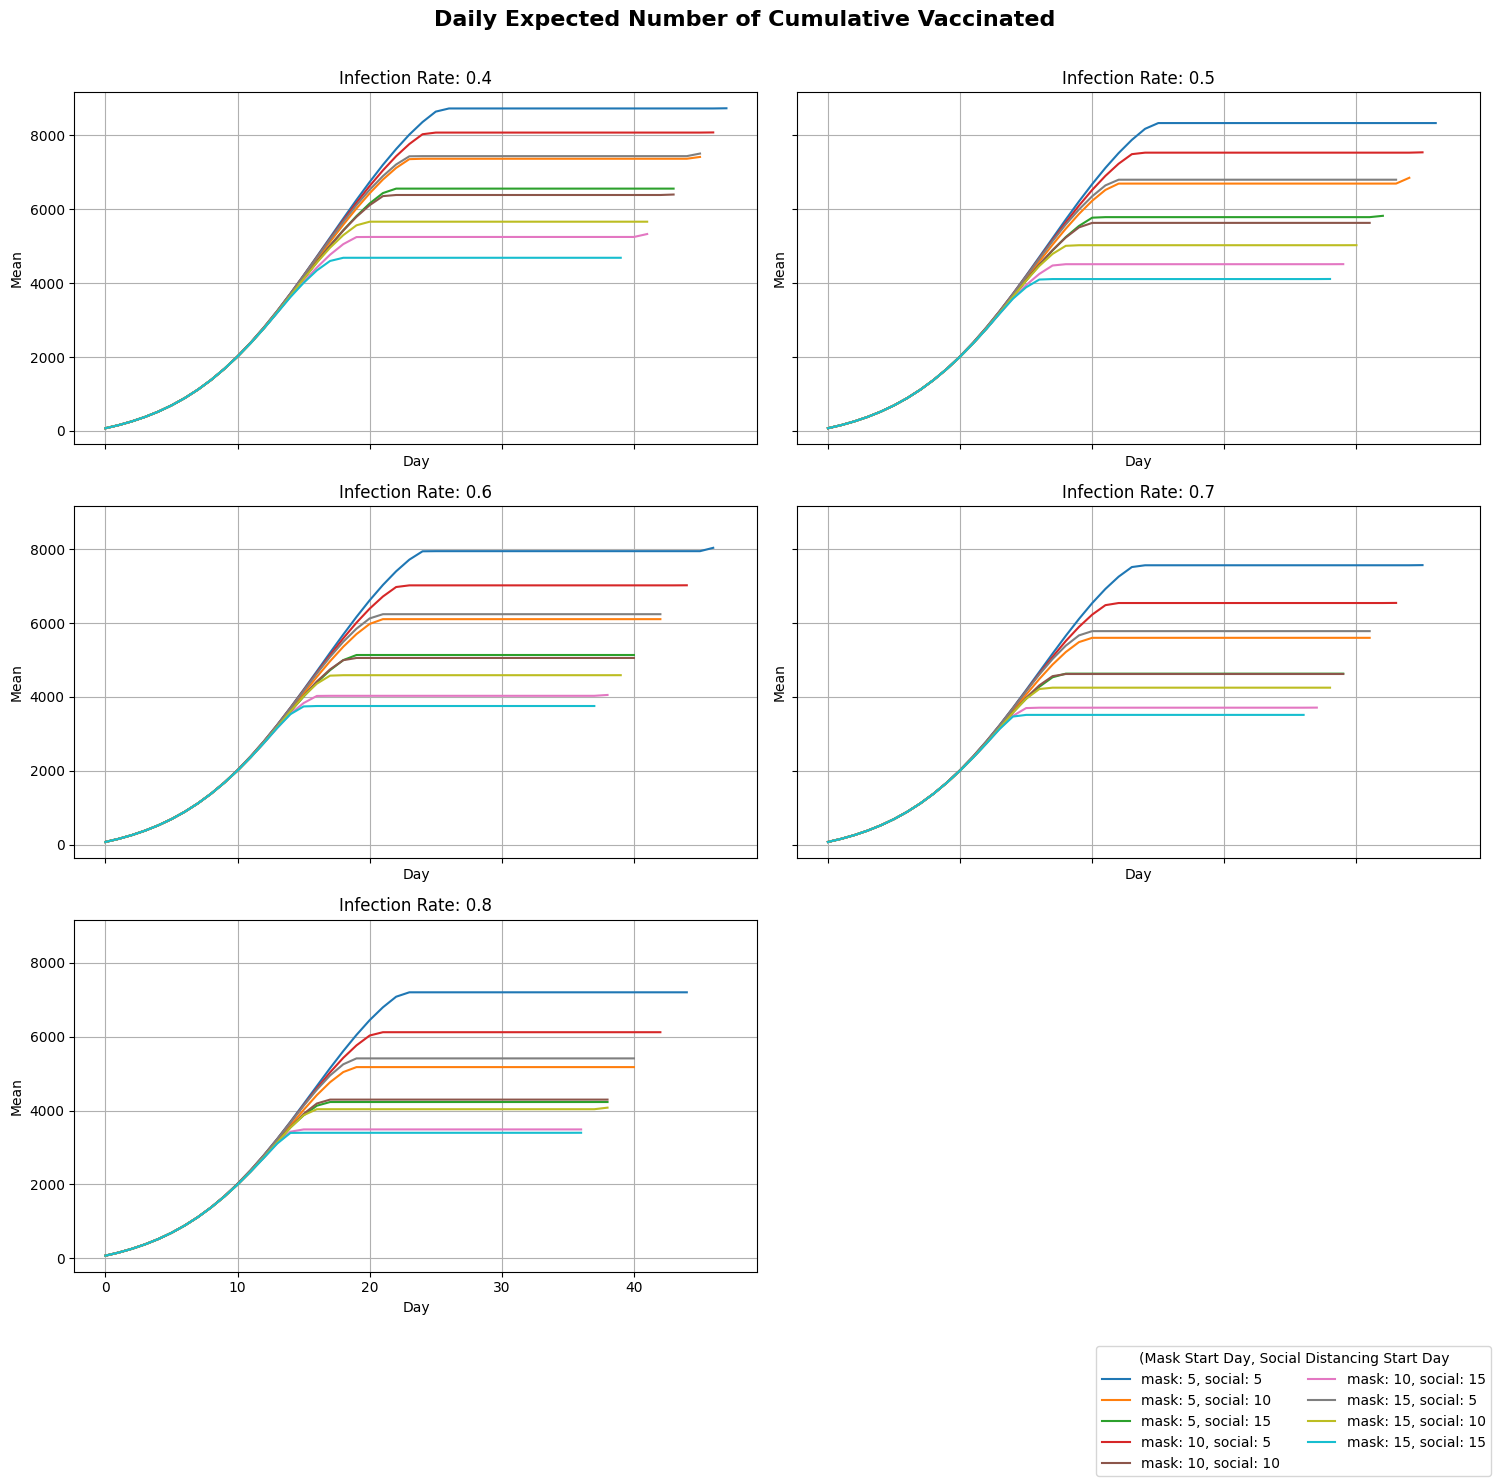

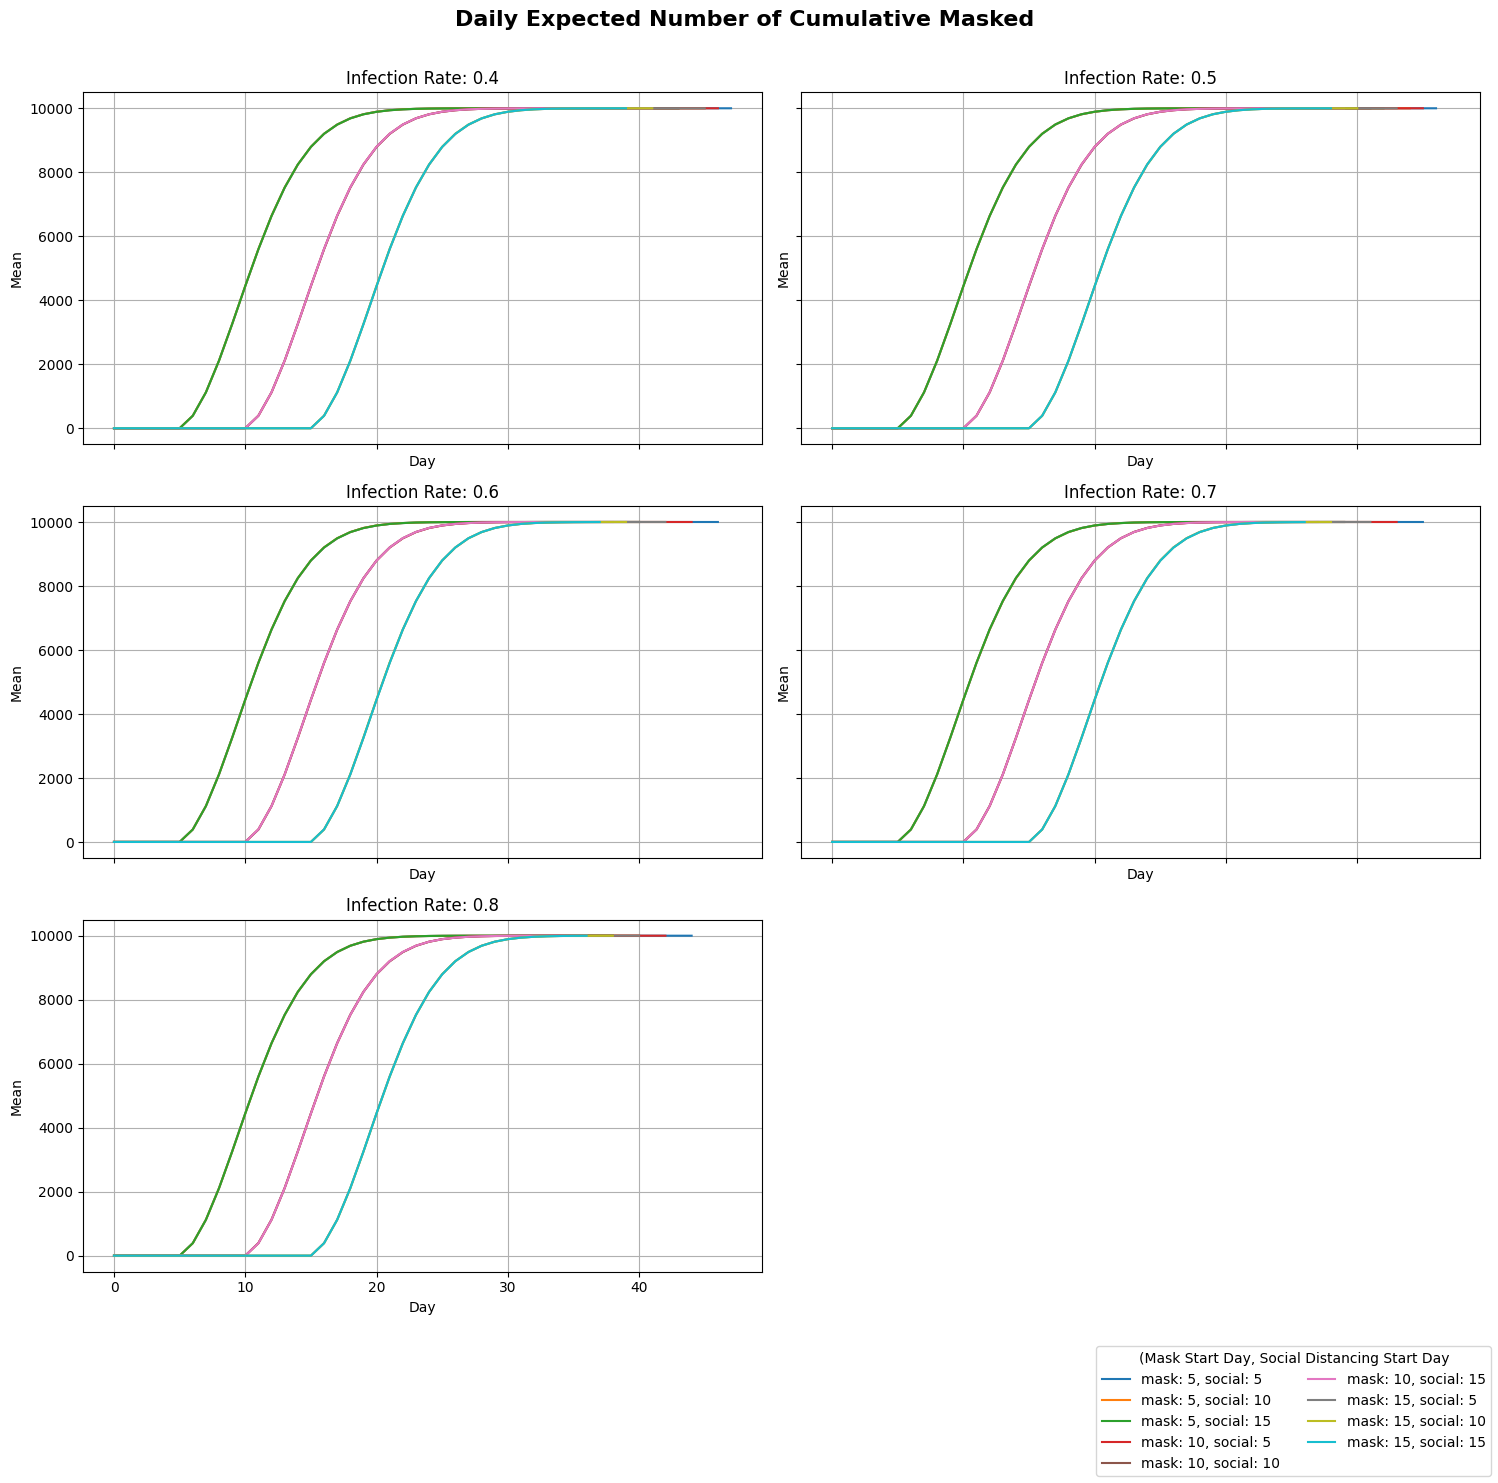

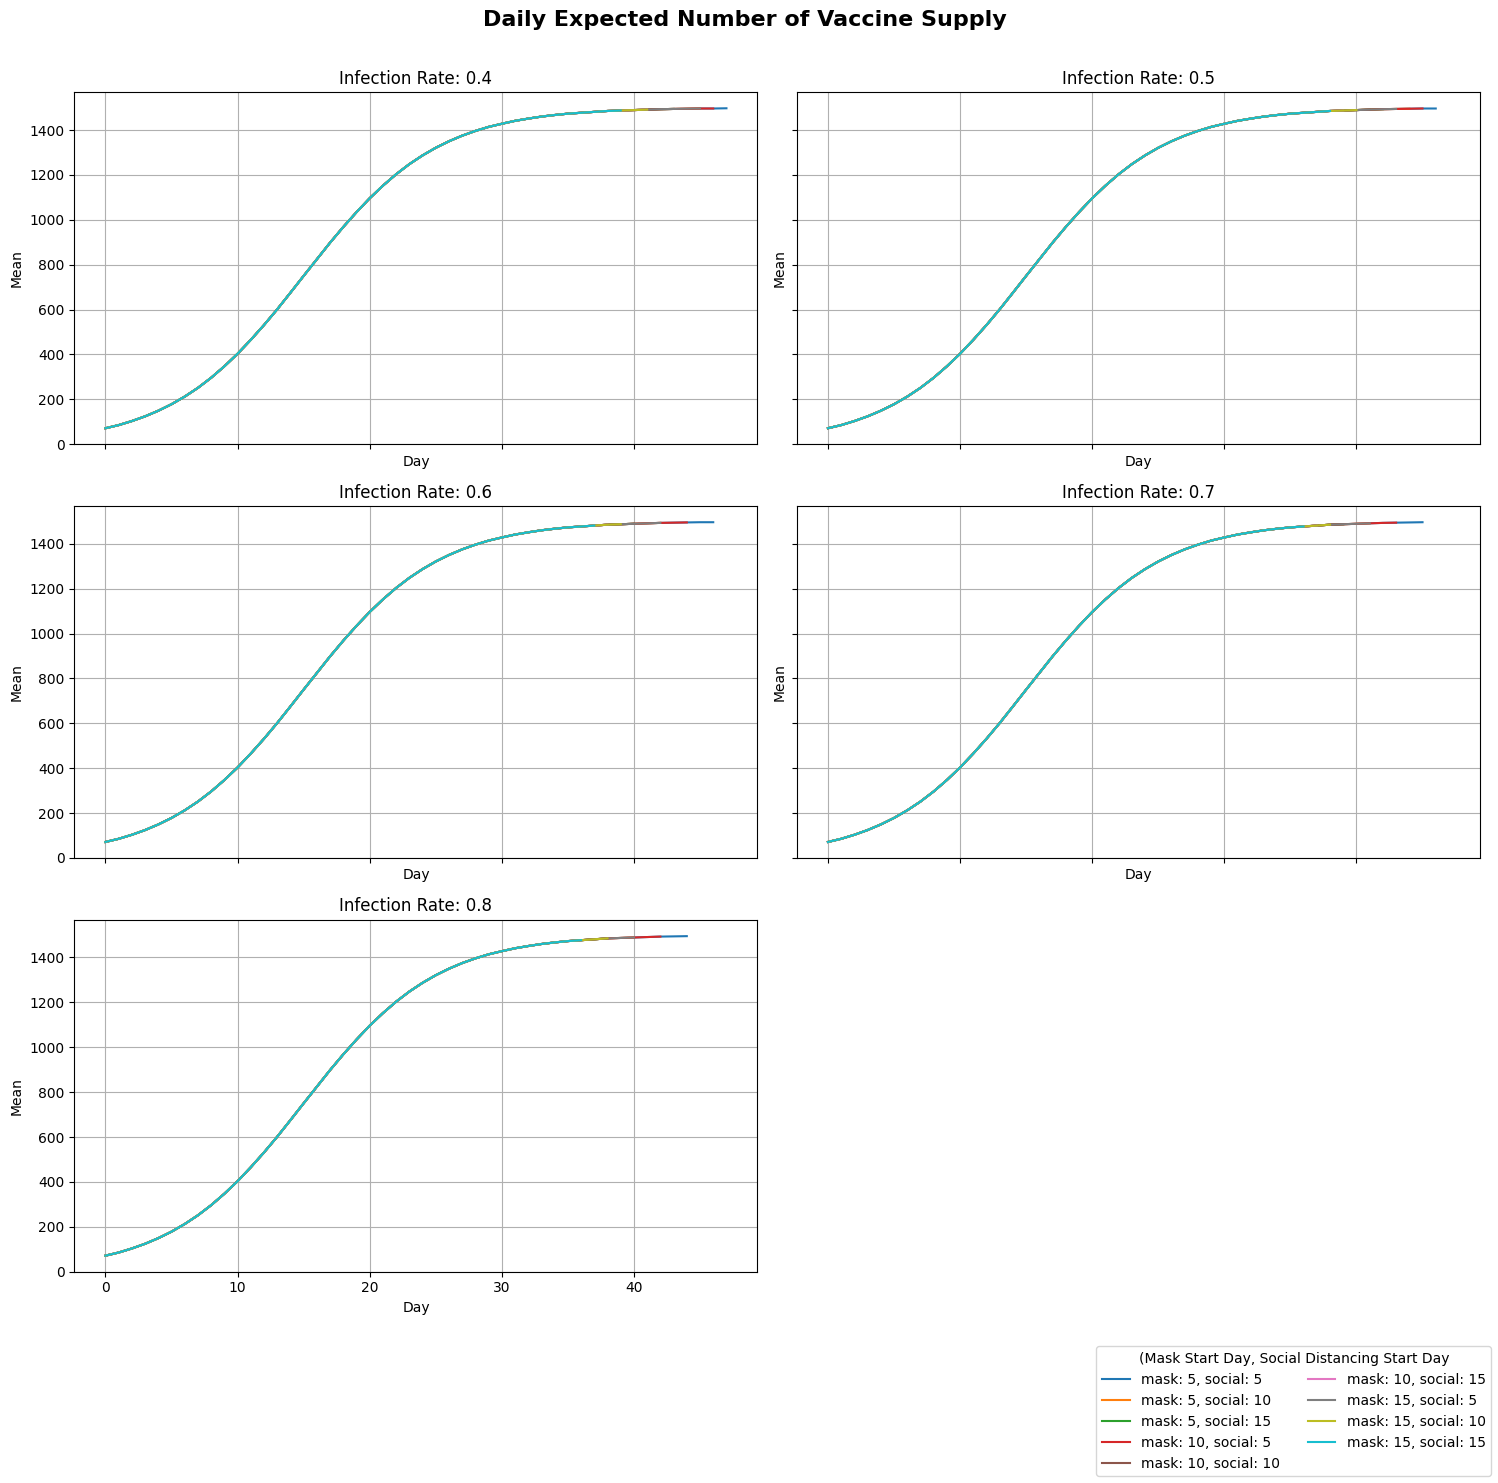

In [92]:
infection_rates = [0.4, 0.5, 0.6, 0.7, 0.8]
for state in states:
    plot_line_graphs(globals()[f"{state}_data"] , infection_rates, title=title_dict[state], save_path=os.path.join(analysis_results_dir, state+'.png'))